# Word Embeddings Example

Word embedding is the collective name for a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers. Conceptually it involves a mathematical embedding from a space with one dimension per word to a continuous vector space with a much lower dimension.

Methods to generate this mapping include neural networks, dimensionality reduction on the word co-occurrence matrix,probabilistic models, explainable knowledge base method, and explicit representation in terms of the context in which words appear.

The following code can be found at Machine Learning Mastery's website, the article is called How to Use Word Embedding Layers for Deep Learning with Keras: 
* https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [1]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


A bunch of documents and labels:

In [2]:
# define documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']

# define class labels
labels = array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

Develop vocabulary using one-hot encoding for vector:

In [3]:
# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[25, 48], [18, 22], [39, 3], [17, 22], [28], [37], [3, 3], [40, 18], [3, 22], [40, 19, 48, 4]]


Pad documents so they have the same lenght:

In [4]:
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[25 48  0  0]
 [18 22  0  0]
 [39  3  0  0]
 [17 22  0  0]
 [28  0  0  0]
 [37  0  0  0]
 [ 3  3  0  0]
 [40 18  0  0]
 [ 3 22  0  0]
 [40 19 48  4]]


Create a model:

In [5]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 8)              400       
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f, Loss: %f' % (accuracy * 100, loss * 100))

Accuracy: 89.999998, Loss: 60.586321


Get the embeddings from the output of the layer in the NN:

In [7]:
def get_embeddings(model):

    # Embedding Layer
    embedding_layer = model.layers[0]
    embeddings = embedding_layer.get_weights()[0]
    print 'Embedding Layer shape:', embeddings.shape
    
    return embeddings

In [8]:
embeddings = get_embeddings(model)

Embedding Layer shape: (50, 8)


In [9]:
embeddings[0]

array([-0.07965571,  0.03931827,  0.07168572, -0.02223385, -0.05308065,
        0.00474267,  0.00714363, -0.04764463], dtype=float32)

Reduce the dimensionality to 2 dimensions using Principal Component Analysis (PCA):

In [10]:
from sklearn.decomposition import PCA

def get_pca(embeddings):

    # PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(embeddings)
    print 'PCA explained variance ratio:', pca.explained_variance_ratio_, 'Total:', sum(pca.explained_variance_ratio_)
    return principal_components

In [11]:
pca = get_pca(embeddings)

PCA explained variance ratio: [ 0.4089525   0.15840261] Total: 0.567355111241


In [12]:
from keras.preprocessing.text import text_to_word_sequence

# create dictionary
id_to_word = {}
i = 0
while i < len(encoded_docs):
    encoded_doc = encoded_docs[i]
    words = text_to_word_sequence(docs[i])
    j = 0
    while j < len(encoded_doc):
        index = encoded_doc[j]
        word = words[j]
        if index not in id_to_word:
            id_to_word[index] = word
        j += 1
    i += 1

Dictionary of words:

In [13]:
id_to_word

{3: 'effort',
 4: 'better',
 17: 'nice',
 18: 'good',
 19: 'have',
 22: 'work',
 25: 'well',
 28: 'excellent',
 37: 'weak',
 39: 'great',
 40: 'not',
 48: 'done'}

Plot them!

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def plot_dimensionality_reduction(low_dim_embs, figsize=(8, 8)):

    plt.figure(figsize=figsize, dpi=100)
    ax = plt.axes()
    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.xaxis.set_major_locator(plt.NullLocator())
    
    i = 0
    while i < len(low_dim_embs):

        if i in id_to_word:
            x, y = low_dim_embs[i, :]
            word = id_to_word[i]

            plt.scatter(x, y, color='b')
            plt.annotate(word,
                        xy=(x, y),
                        xytext=(5, 2),
                        textcoords='offset points',
                        ha='right',
                        va='bottom',
                        fontsize=14)
        
        i += 1

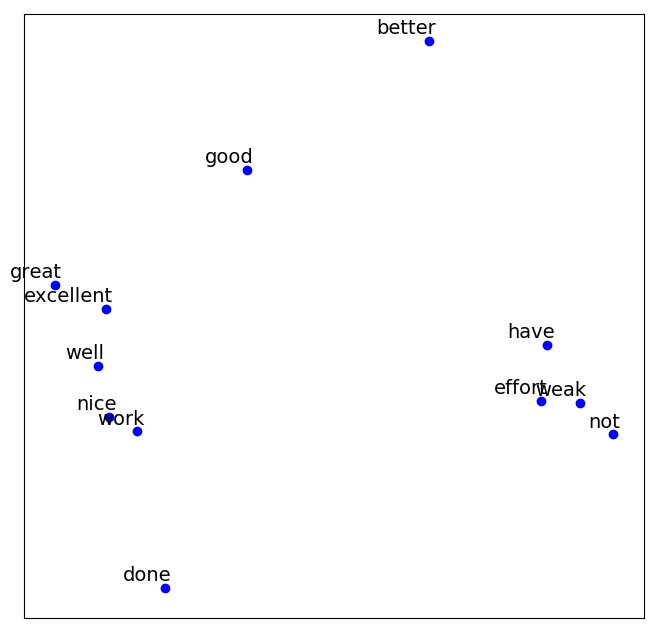

In [16]:
plot_dimensionality_reduction(pca)